<a href="https://colab.research.google.com/github/VishnuBhaarath/TimeSeriesAnalysis/blob/master/TimeSeriesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [0]:
df=pd.read_excel('data_pcp_10.xlsx')

In [22]:
df.head()

,Date,Station,PCP
0,2000-01-01,1,0.0
1,2000-01-02,1,0.0
2,2000-01-03,1,0.0
3,2000-01-04,1,0.0
4,2000-01-05,1,0.0


In [23]:
df.tail()

,Date,Station,PCP
4013,2010-12-27,1,0.0
4014,2010-12-28,1,0.0
4015,2010-12-29,1,0.0
4016,2010-12-30,1,0.0
4017,2010-12-31,1,0.0


In [24]:
df.describe()

,Station,PCP
count,4018.0,4018.000000
mean,1.0,2.433723
std,0.0,9.279749
min,1.0,0.000000
25%,1.0,0.000000
50%,1.0,0.000000
75%,1.0,0.000000
max,1.0,144.200000


In [0]:
train=df[0:3500] 
test=df[3500:]


In [65]:
test.head

<bound method NDFrame.head of                  Date  Station  PCP
Date                               
2009-08-01 2009-08-01        1  0.0
2009-08-02 2009-08-02        1  0.0
2009-08-03 2009-08-03        1  0.0
2009-08-04 2009-08-04        1  0.0
2009-08-05 2009-08-05        1  0.0
...               ...      ...  ...
2010-12-27 2010-12-27        1  0.0
2010-12-28 2010-12-28        1  0.0
2010-12-29 2010-12-29        1  0.0
2010-12-30 2010-12-30        1  0.0
2010-12-31 2010-12-31        1  0.0

[518 rows x 3 columns]>

In [26]:
df.Timestamp = pd.to_datetime(df.Date,format='%Y-%m-%d ') 
df.index = df.Timestamp 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [27]:
df.head()

,Date,Station,PCP
Date,,,
2000-01-01,2000-01-01,1,0.0
2000-01-02,2000-01-02,1,0.0
2000-01-03,2000-01-03,1,0.0
2000-01-04,2000-01-04,1,0.0
2000-01-05,2000-01-05,1,0.0


In [29]:
train.Timestamp = pd.to_datetime(train.Date,format='%Y-%m-%d ') 
train.index = train.Timestamp 
test.Timestamp = pd.to_datetime(test.Date,format='%Y-%m-%d ') 
test.index = test.Timestamp 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


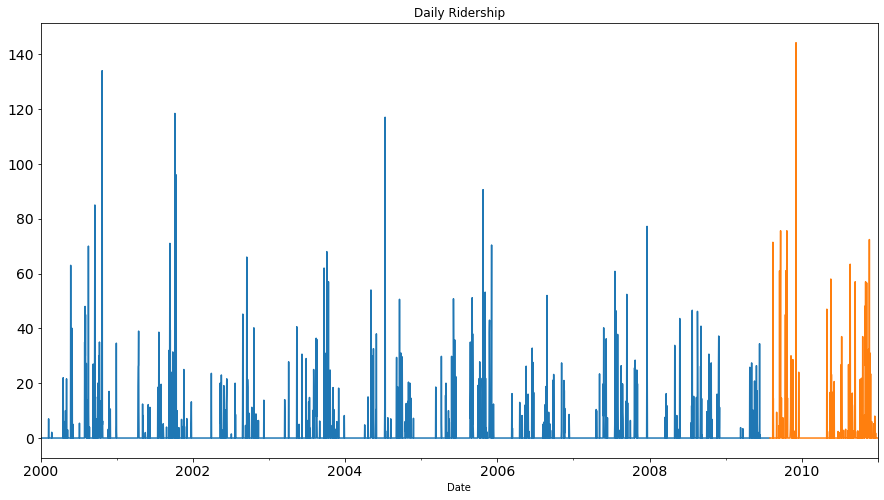

In [32]:
train.PCP.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
test.PCP.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
plt.show()

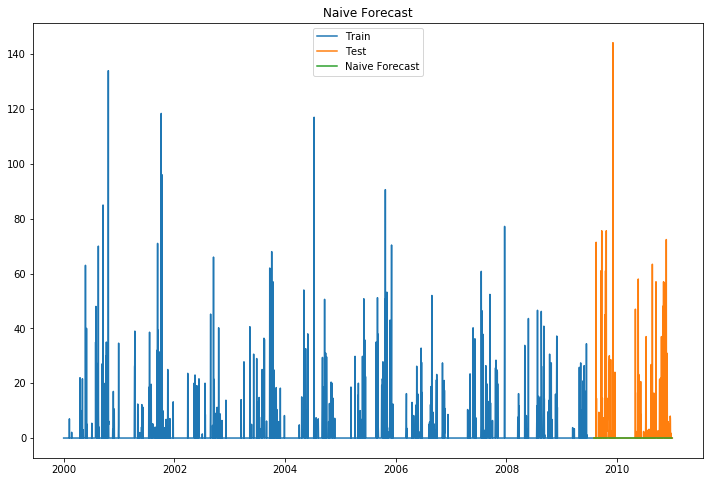

In [34]:
dd= np.asarray(train.PCP)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['PCP'], label='Train')
plt.plot(test.index,test['PCP'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.PCP, y_hat.naive))
print(rms)

13.692865148848723


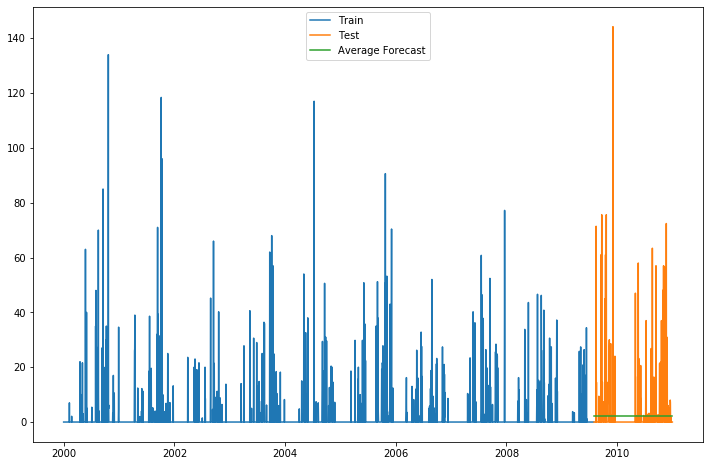

In [37]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['PCP'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['PCP'], label='Train')
plt.plot(test['PCP'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [39]:
rms = sqrt(mean_squared_error(test.PCP, y_hat_avg.avg_forecast))
print(rms)

13.228862693569585


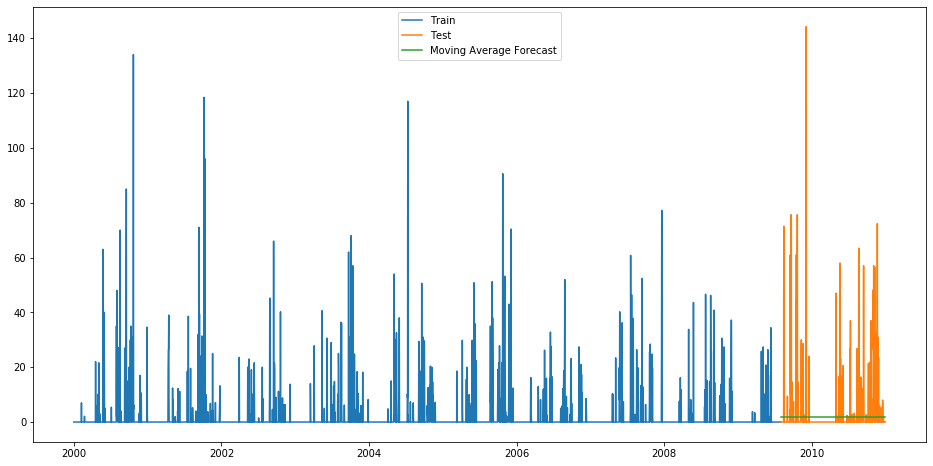

In [47]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['PCP'].rolling(100).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['PCP'], label='Train')
plt.plot(test['PCP'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [48]:
rms = sqrt(mean_squared_error(test.PCP, y_hat_avg.moving_avg_forecast))
print(rms)

13.290604469550026


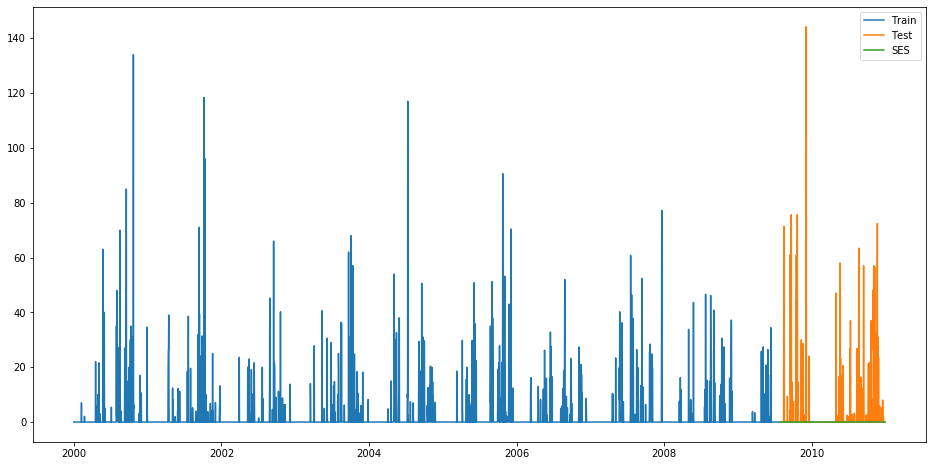

In [52]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['PCP'])).fit(smoothing_level=0.5,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['PCP'], label='Train')
plt.plot(test['PCP'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [53]:
rms = sqrt(mean_squared_error(test.PCP, y_hat_avg.SES))
print(rms)

13.692865148848714


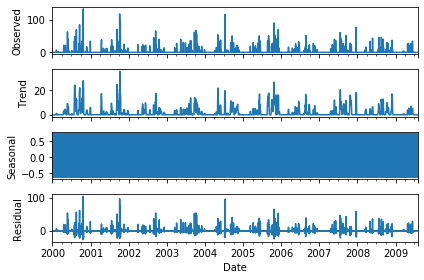

In [54]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.PCP).plot()
result = sm.tsa.stattools.adfuller(train.PCP)
plt.show()

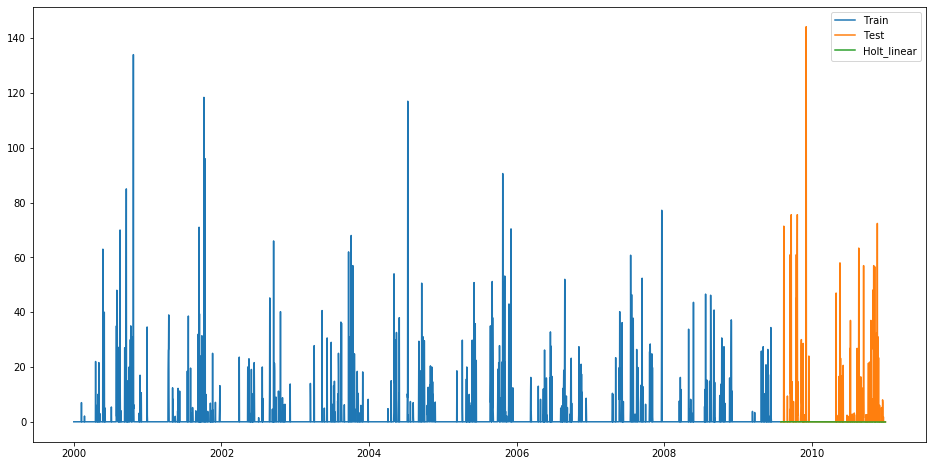

In [55]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['PCP'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['PCP'], label='Train')
plt.plot(test['PCP'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [56]:
rms = sqrt(mean_squared_error(test.PCP, y_hat_avg.Holt_linear))
print(rms)

13.705697314291463


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


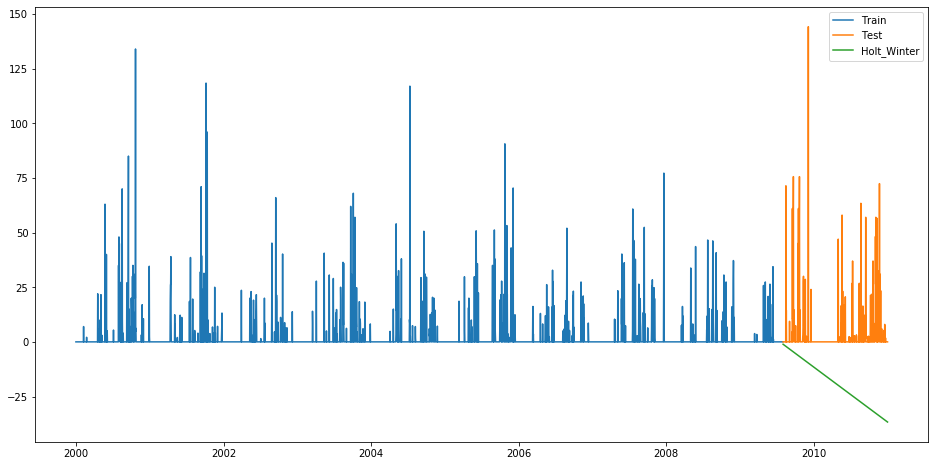

In [63]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['PCP']) ,seasonal_periods=10 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['PCP'], label='Train')
plt.plot(test['PCP'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()


In [64]:
rms = sqrt(mean_squared_error(test.PCP, y_hat_avg.Holt_Winter))
print(rms)

28.205384630915393


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


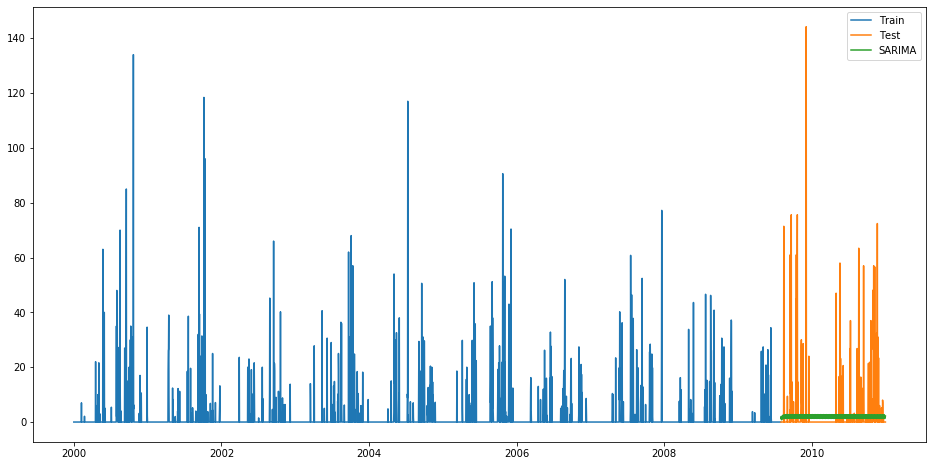

In [67]:
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.PCP, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2009-08-1", end="2010-12-31", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train['PCP'], label='Train')
plt.plot(test['PCP'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [68]:
rms = sqrt(mean_squared_error(test.PCP, y_hat_avg.SARIMA))
print(rms)



13.264479826692154
